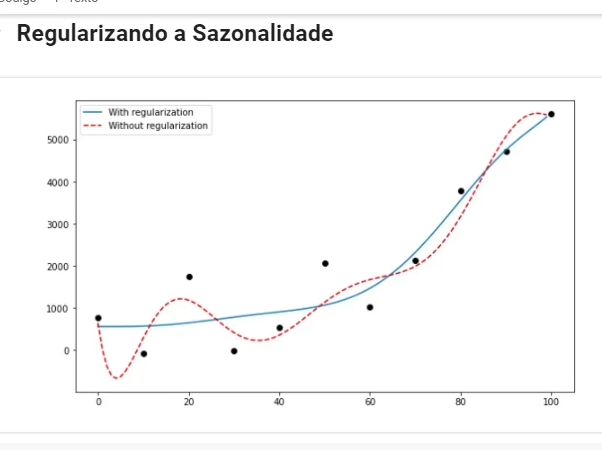

- Muitas vezes, ao resolver um problema com aprendizado de máquina, os dados envolvidos são tão complexos que um modelo simples não é poderoso o suficiente para capturar toda a sutileza dos padrões a serem encontrados nos dados. 

O modelo simples tende a não se ajustar aos dados. 

- Em contraste, o modelo mais complicado, mais complexo, com muitos parâmetos e uma grande flexibilidade pode tender a se sobre ajustar os dados e nem sempre é fácil ou possível utilizar um modelo mais simples para resolver um problema. 


Um modelo mais complexo, a regularização é uma boa técnica para ser usada para controlar o overfitting desse modelo mais complexo. 

Se cuidando, o modelo pode ser muito fácil para se ajustar a esses dados. 

- O que é a regularização ?

- A regularização é uma técnica para controlar a flexibilidade do modelo ao dado. Há dois extremos que temos que tomar cuidado. 

O underfitting que é quando o modelo não consegue capturar o verdadeiro relacionamento entre os dados, que estamos passando para ele, e o resultado esperado. E nesse caso, a performance do modelo tende a ser ruim, tanto no treinamento quanto no teste. Neste caso, dizemos que temos um modelo pouco flexível ou rígido. 

Por outro lado, temos o overfitting, que é quando o modelo captura o relacionamento real dos dados e das variáveis. Mas, também captura muito do ruído presente no dado, o que faz com que a simulação fique tão apegada a esses detalhes utilizando nos dados de treinamento, que o modelo não consiga fazer uma previsão genérica para situações que podem mudar um pouquinho do dado que o modelo conhece. 


A performance desse tipo de modelo costuma ser muito alta no treinamento, mas em contrapartida, muito ruim no teste.  

### Um exemplo, é na figura acima, onde a linha tracejada e vermelha é a previsão 'não regularizada', onde podemos ver que ela se ajusta demais aos dados - seguindo qualquer ruído da variação da informação. 


### Já na linha sólida e azul, por mais que não seja perfeita, a previsão é mais coerente e genérica.

### Que possivelmente vai se ajustar melhor aos dados novos. Nós fazemos a regularização da previsão no Prophet através de um argumento chamado prime scale. 

Há duas formas de se aplicar a regularização, a forma global e a forma local. 

- A regularização global é aquela que é aplicada a todas as sazonalidades de uma única vez. Vamos ver isso na prática com os dados da divvy bikes.

In [2]:
import pandas as pd

df= pd.read_csv('divvy_daily.csv')
df

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow
...,...,...,...,...
1453,12/27/2017,1117,2.458013,cloudy
1454,12/28/2017,1267,10.802762,rain or snow
1455,12/29/2017,1049,12.978932,cloudy
1456,12/30/2017,519,3.657033,cloudy


In [3]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df

/tmp/ipykernel_15237/12766143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32
...,...,...
1453,2017-12-27,1117
1454,2017-12-28,1267
1455,2017-12-29,1049
1456,2017-12-30,519


Vamos instanciar nosso modelo, nós vamos primeiramente executar sem nenhuma regularização, para depois compararmos com os dados regularizados/ da regularização.

In [5]:
from prophet import Prophet

model = Prophet(seasonality_mode ='multiplicative', yearly_seasonality=4)

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast

18:02:37 - cmdstanpy - INFO - Chain [1] start processing
18:02:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3624.191625,-241.558973,3479.813088,3624.191625,3624.191625,-0.520406,-0.520406,-0.520406,0.132233,0.132233,0.132233,-0.652639,-0.652639,-0.652639,0.0,0.0,0.0,1738.141962
1,2014-01-02,3628.752860,-248.967337,3671.686588,3628.752860,3628.752860,-0.526077,-0.526077,-0.526077,0.127486,0.127486,0.127486,-0.653564,-0.653564,-0.653564,0.0,0.0,0.0,1719.747877
2,2014-01-03,3633.314095,-362.310033,3514.911314,3633.314095,3633.314095,-0.577595,-0.577595,-0.577595,0.076547,0.076547,0.076547,-0.654142,-0.654142,-0.654142,0.0,0.0,0.0,1534.731233
3,2014-01-04,3637.875329,-1665.274899,2138.581485,3637.875329,3637.875329,-0.938860,-0.938860,-0.938860,-0.284479,-0.284479,-0.284479,-0.654381,-0.654381,-0.654381,0.0,0.0,0.0,222.419192
4,2014-01-05,3642.436564,-1821.443273,1955.615311,3642.436564,3642.436564,-0.979183,-0.979183,-0.979183,-0.324890,-0.324890,-0.324890,-0.654293,-0.654293,-0.654293,0.0,0.0,0.0,75.825446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018-12-27,8991.694558,2379.760313,6232.841364,8867.025911,9099.294992,-0.514286,-0.514286,-0.514286,0.127486,0.127486,0.127486,-0.641773,-0.641773,-0.641773,0.0,0.0,0.0,4367.389210
1819,2018-12-28,8993.544548,1932.671466,5701.112412,8868.393051,9101.737218,-0.568100,-0.568100,-0.568100,0.076547,0.076547,0.076547,-0.644647,-0.644647,-0.644647,0.0,0.0,0.0,3884.310240
1820,2018-12-29,8995.394538,-1232.324825,2456.802216,8869.738137,9104.175246,-0.931615,-0.931615,-0.931615,-0.284479,-0.284479,-0.284479,-0.647136,-0.647136,-0.647136,0.0,0.0,0.0,615.153666
1821,2018-12-30,8997.244528,-1519.813315,2254.289645,8871.106809,9106.613274,-0.974135,-0.974135,-0.974135,-0.324890,-0.324890,-0.324890,-0.649245,-0.649245,-0.649245,0.0,0.0,0.0,232.713807


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


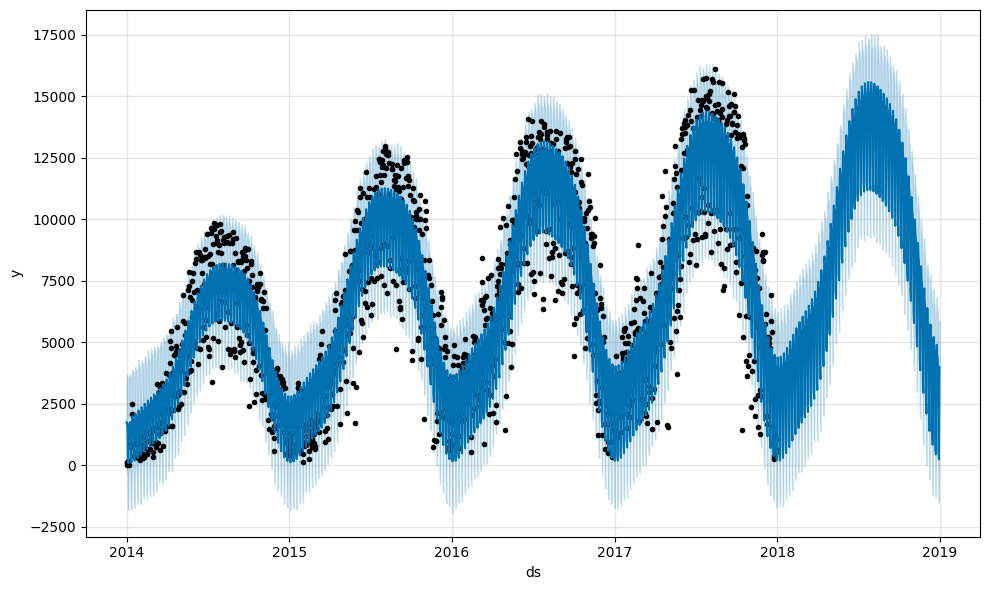

In [9]:
import matplotlib.pyplot as plt


#modelo se ajustando aos dados reais, modelo azul, pontos reais
fig = model.plot(forecast)
plt.show()



/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

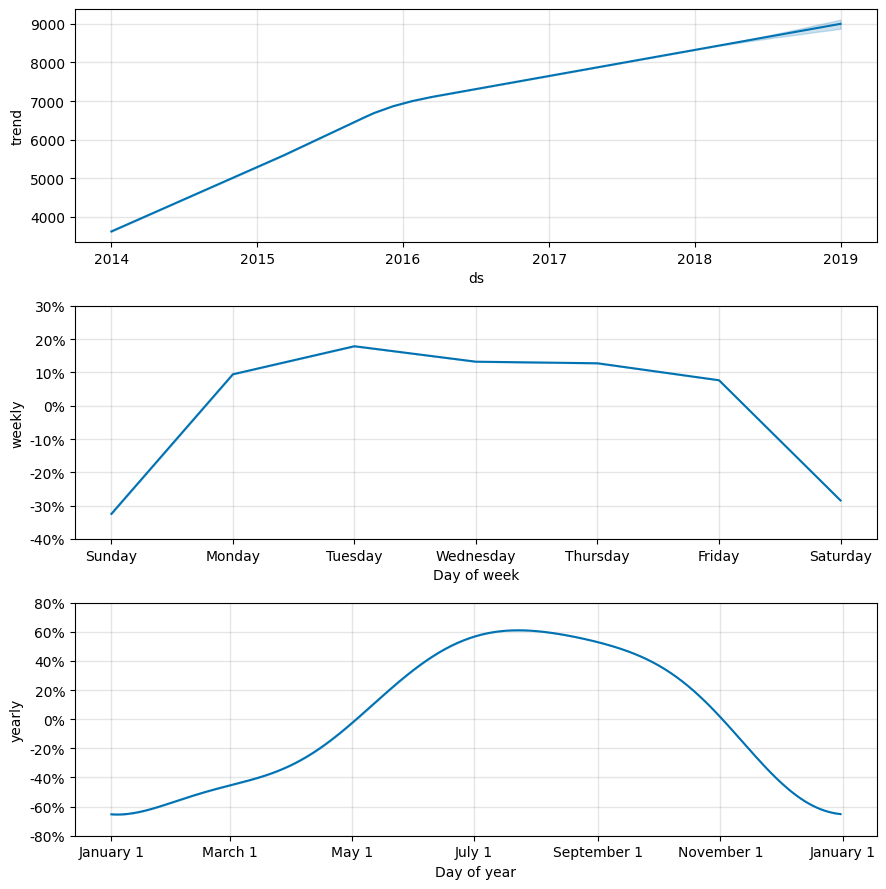

In [10]:
fig2 = model.plot_components(forecast)
plt.show()


O tamanho da amplitude da sazonalidade (weekly), antes da regularização. Há uma diferença de 40%. Sai de -30%, para mais 10% na seugnda.

Anual também está grande, -60%, com pico em agosto, de mais de 60%. 

## Com a regularização, vamos ajustar essa sensibilidade dos dados.  

Esta amplitude pode ser demasiada.

# a regularização da forma global =>  seasonality_prior_scale=.01

In [11]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    seasonality_prior_scale=.01)


 seasonality_prior_scale é comum o range de 0,005 à 10, para os parâmetros. Onde 10 é uma flexibilidade muito alta, ou seja, vai se ajustar muito ao dado e 0,005, é um modelo rigido, pouca flexibilidade na sazonalidade. 

In [13]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.head()


18:15:50 - cmdstanpy - INFO - Chain [1] start processing
18:15:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3371.532315,-683.120082,5950.539810,3371.532315,3371.532315,-0.167277,-0.167277,-0.167277,0.042527,0.042527,0.042527,-0.209804,-0.209804,-0.209804,0.0,0.0,0.0,2807.552788
1,2014-01-02,3377.614373,-573.346198,6318.437275,3377.614373,3377.614373,-0.168059,-0.168059,-0.168059,0.040826,0.040826,0.040826,-0.208885,-0.208885,-0.208885,0.0,0.0,0.0,2809.975980
2,2014-01-03,3383.696431,-809.866902,6047.000996,3383.696431,3383.696431,-0.183640,-0.183640,-0.183640,0.024213,0.024213,0.024213,-0.207853,-0.207853,-0.207853,0.0,0.0,0.0,2762.315317
3,2014-01-04,3389.778489,-1100.119741,5864.913820,3389.778489,3389.778489,-0.298257,-0.298257,-0.298257,-0.091543,-0.091543,-0.091543,-0.206714,-0.206714,-0.206714,0.0,0.0,0.0,2378.752589
4,2014-01-05,3395.860547,-957.469598,5847.840635,3395.860547,3395.860547,-0.310138,-0.310138,-0.310138,-0.104664,-0.104664,-0.104664,-0.205474,-0.205474,-0.205474,0.0,0.0,0.0,2342.673492


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


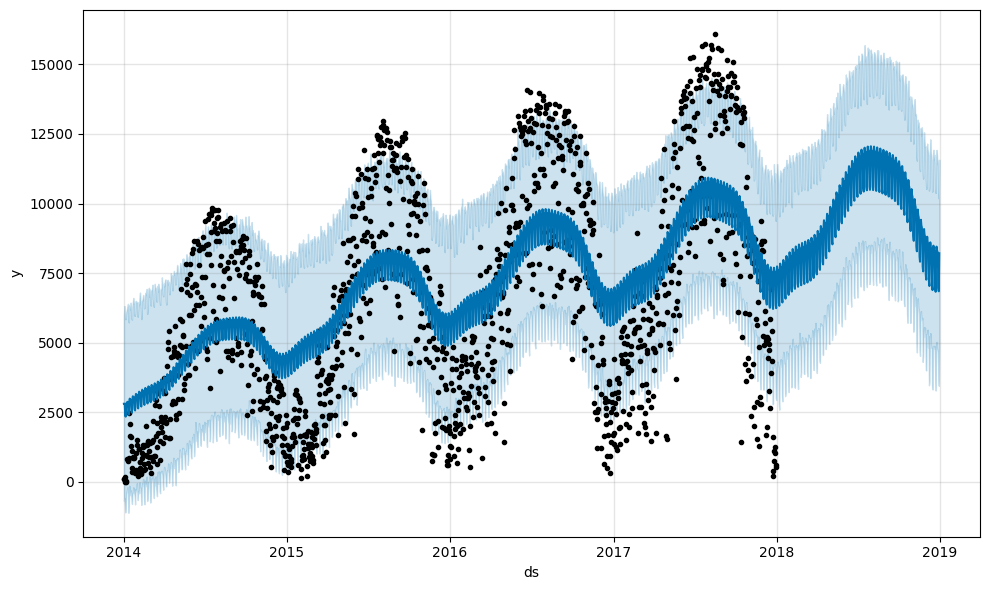

In [14]:
import matplotlib.pyplot as plt


#modelo se ajustando aos dados reais, modelo azul, pontos reais
fig = model.plot(forecast)
plt.show()


O modelo com a regularização, a previsão está mais rígido, isso não significa que o modelo está bom ou ruim. É mais uma demonstração de que nós podemos ajustar o comportamento do profit perante os dados. 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

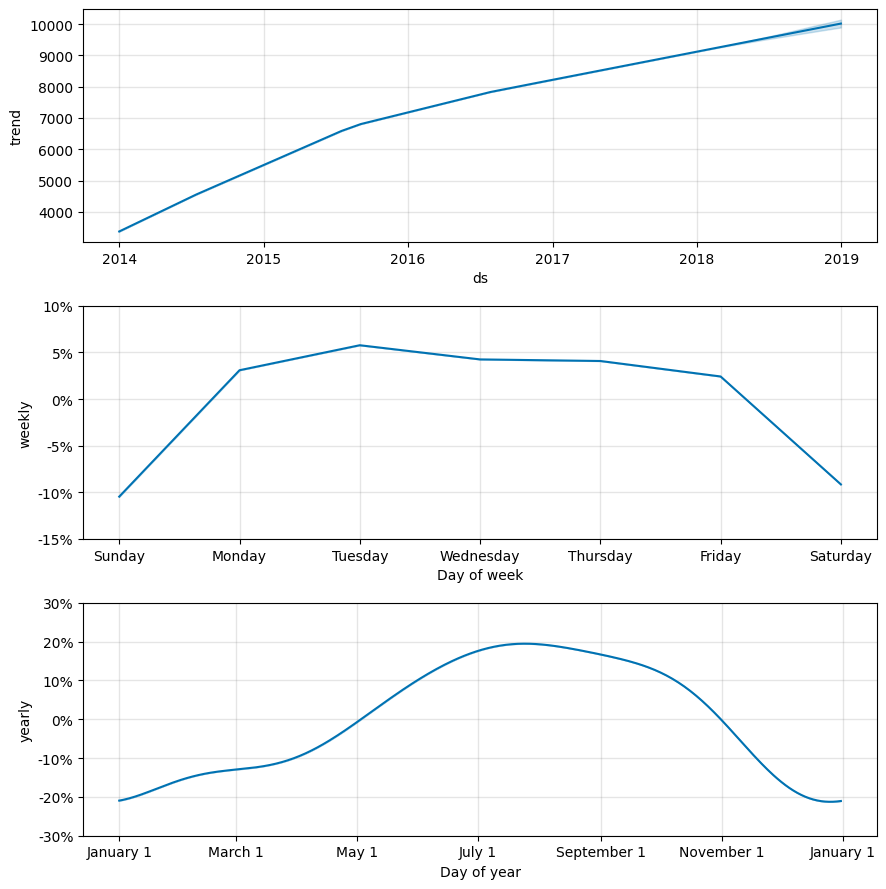

In [15]:
fig2 = model.plot_components(forecast)
plt.show()

Impacto disso nas sazonalidades anuais e semanais: 

Semanal, agora está -10% e o anual -20%, agora, as curvas estão ficando cada vez mais planas.  

### Com issos, os dados dos modelos ficaram mais rígidos. 

### Dessa forma que nós regularizamos o modelo de forma global. 

## As vezes você quer mudar o compartamento apenas de um tipo de sazonalidade, a outra você gostou é quer manter. 

Para isso, podemos regularizar uma sazonalidade individualmente


Isso é regularização global

#### Vamos precisar instanciar o nosso modelo desativando a sazonalidade automática do prophet. 

In [17]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=4,
    weekly_seasonality=False) # vamos desativar a sazonalidade semanal, e criar outro tipo


# Só a semanal tem a regularização personalizada

In [18]:
# vamos criar uma nava sazonalidade semanal, com um novo prior_scale


model.add_seasonality(
    name='weekly',
    period=7,
    fourier_order=4,
    prior_scale=0.01)


18:42:32 - cmdstanpy - INFO - Chain [1] start processing
18:42:32 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


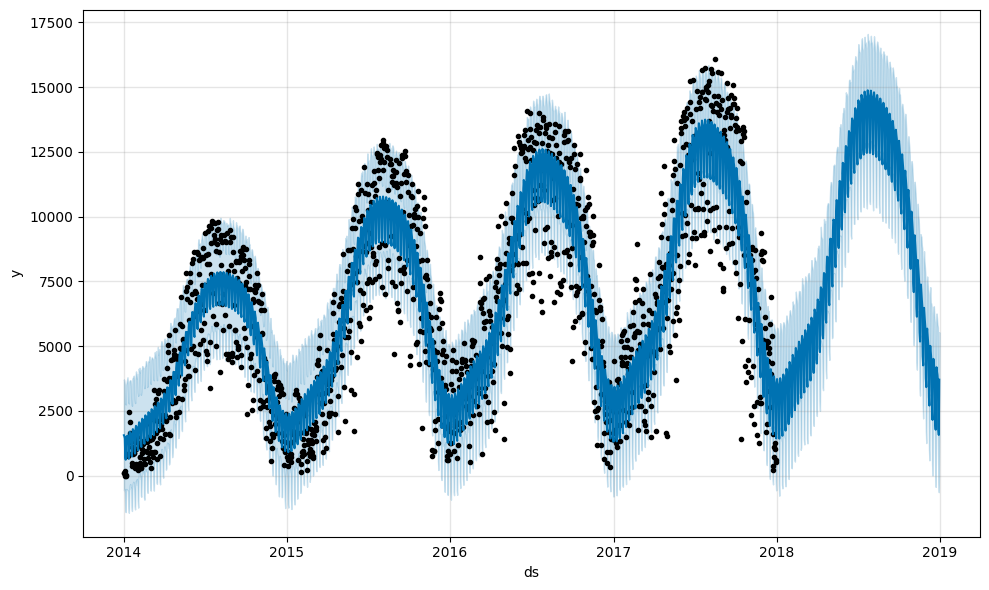

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

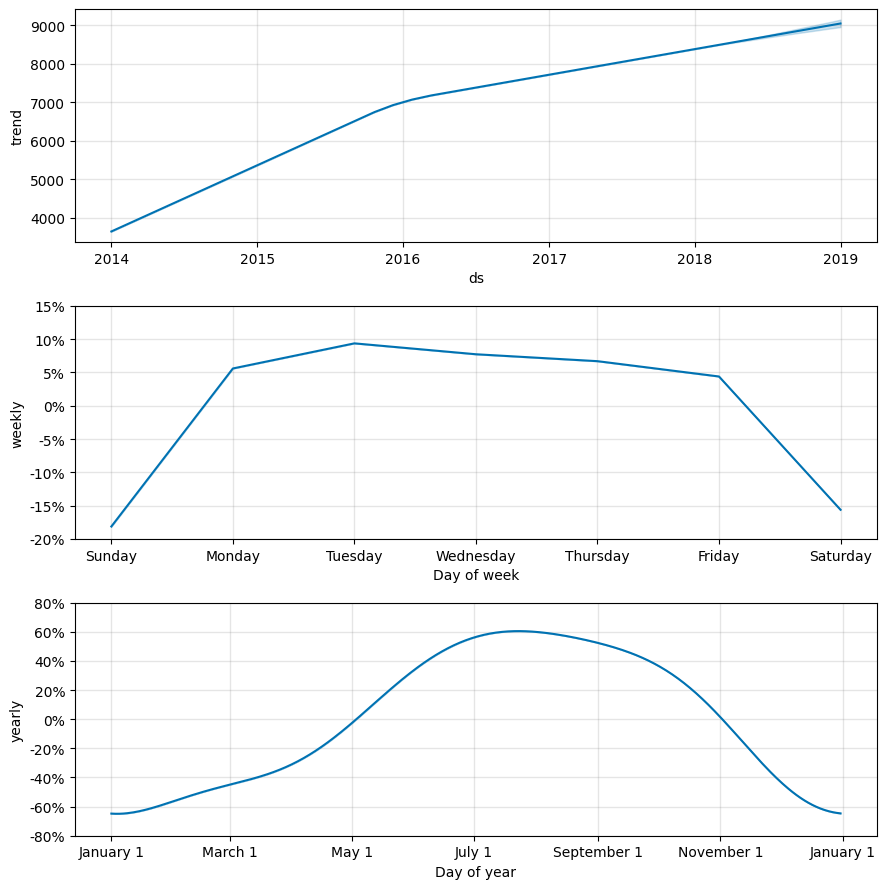

In [19]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

Controlamos o nǘiel de sensibilidade, tanto da forma global quanto local. 